# Week 6 Tutorial

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

## Exercise 1

In [2]:
img = cv.imread("images/boat.jpg", 0)

th = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

# Find contours in the binary image
contours, _ = cv.findContours(th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the regions with boat and people
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

show_img("contours", img)

## Exercise 2

In [4]:
img = cv.imread("images/leaf.jfif", 0)

th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
# trackbar
def nothing(x):
    pass

wn = 'Morphological Transformations'
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 10, nothing)
cv.createTrackbar("iter", wn, 3, 10, nothing)

while(1):
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size = 3
    
    iteration = cv.getTrackbarPos("iter", wn)
    if iteration < 1:
        iteration = 1
    
    # define the kernel
    kernel = np.ones((size, size), dtype=np.uint8)
    # erosion
    erosion = cv.erode(th2, kernel, iterations=iteration)
    
    cv.imshow(wn, erosion)
    k = cv.waitKey(1) & 0xFF
    if k==27:
        break
        
cv.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'Morphological Transformations' in function 'cvGetTrackbarPos'


## Exercise 3

In [5]:
blue_low = (90, 50, 50)
blue_high = (130, 255, 255)

white_low = (0, 0, 200)
white_high = (180, 30, 255)

def color_seg(img, color_low, color_high, color_low2, color_high2, smooth=True):
    """Aguments
    img: source image (RGB)
    color_low: hsv low
    color_high: hsv high
    smooth: boolean (Gaussian blurring)"""
    img_ori = img.copy()
    if smooth: 
        img = cv.GaussianBlur(img, (5, 5), 0)
        
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    mask = cv.inRange(img_hsv, color_low, color_high)
    mask2 = cv.inRange(img_hsv, color_low2, color_high2)
    
    segmented_mask = cv.bitwise_or(mask, mask2)
    res = cv.bitwise_and(img_ori, img_ori, mask=segmented_mask)
    return res

imgs = []

for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)

res = [color_seg(img, blue_low, blue_high, white_low, white_high) for img in imgs]

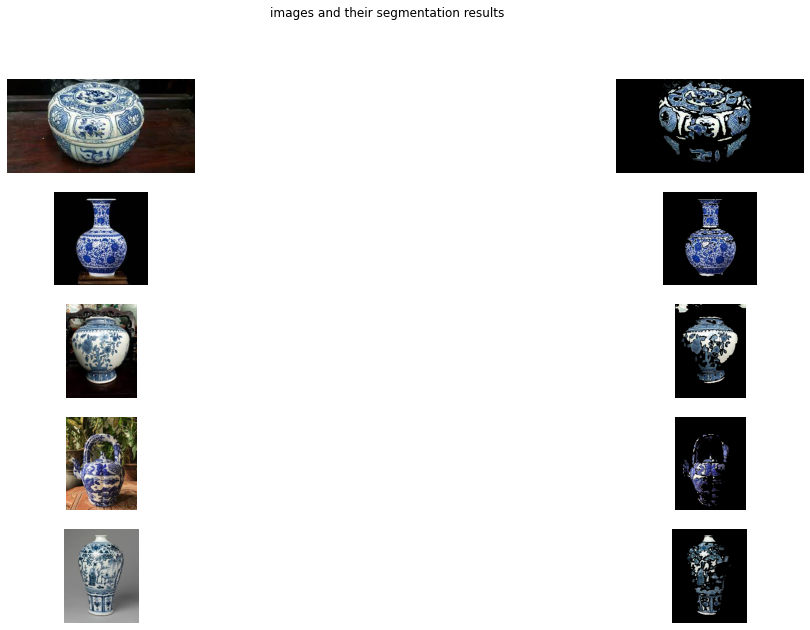

In [6]:
fig, ax = plt.subplots(5, 2, figsize=(20, 10))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")
    
fig.suptitle("images and their segmentation results")
plt.show()